# Lecture 2: More on data transformations

<div style="border: 1px double black; padding: 10px; margin: 10px">

**Goals for today's lecture:**
* Continue to learn how to manipulate data, including:
    * Vectors in R: what they are and basic operations
    * Adding new variables
    * Grouping and summarizing data
    
This lecture note corresponds to sections 4.3-4.6 of your book.
</div>

**Before we move on, let us quickly take a look at the recommended [Coding Style](https://style.tidyverse.org/index.html) which we will apply as much as possible**

In [2]:
install.packages('nycflights13')
library(tidyverse)  # always!
library(nycflights13)  # install if needed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Review of last lecture
Last lecture we learned how to alter the rows and columns of a dataframe:
- `filter()` to keep certain rows that satisfy logical conditions.
- `arrange()` to sort rows according to certain column values.
- `distinct()` to keep only rows that are distinct on some combination of columns.
- `select()` to drop/rename/rearrange columns

## What's a data frame?

Recall the dataframe from the last class

![dataframe](https://garrettgman.github.io/images/tidy-2.png)

## What's a vector?

- In programming speak: a *vector* is a list of values.
- In statistical speak: a vector of observations (aka data).

Let's create a vector and work with it:

The function for creating a vector in R is called simply, `c()`.

In [4]:
# Create a vector
a <- c(1,2,3)

## Functions that operate on vectors

Many summary functions are available:

* Center: `mean(), median()`
* Spread: `sd(), IQR(), mad()`
* Range: `min(), max(), quantile()`
* Position: `first(), last(), nth()`
* Count: `n(), n_distinct()`
* Logical: `any(), all()`

In [5]:
# examples of functions we can use on a vector
mean(a)

[1] 2

## the assignment operator <-  & =

In [ ]:
# example
a <- 10
b = 20

In [8]:
mean(x = c(1:3))
x

[1] 2

ERROR: ignored

In [11]:
?mean

In [9]:
mean(x <- c(1:3))
print(x)

[1] 2

[1] 1 2 3


## Column operation #2: `mutate()`

`mutate()` creates new columns in a dataframe that are calculated from the existing columns.

For example, let's define the **gain** of a flight to be the different between the departure delay and the arrival delay:

$$\text{gain} = \text{dep. delay} - \text{arr. delay}$$

So, the gain is positive if the flight made up time in the air, resulting in a less-delayed arrival.

To add a column called `gain` to flights, we called `mutate()` as follows:

In [15]:
# add a gain column to flights
data <- mutate(flights, gain = dep_delay - arr_delay)

In [16]:
data %>% colnames

[1] "year"           "month"          "day"            "dep_time"      
 [5] "sched_dep_time" "dep_delay"      "arr_time"       "sched_arr_time"
 [9] "arr_delay"      "carrier"        "flight"         "tailnum"       
[13] "origin"         "dest"           "air_time"       "distance"      
[17] "hour"           "minute"         "time_hour"      "gain"

In [13]:
flights %>% colnames

[1] "year"           "month"          "day"            "dep_time"      
 [5] "sched_dep_time" "dep_delay"      "arr_time"       "sched_arr_time"
 [9] "arr_delay"      "carrier"        "flight"         "tailnum"       
[13] "origin"         "dest"           "air_time"       "distance"      
[17] "hour"           "minute"         "time_hour"

The returned data set has a new column called `gain` added to the very end. If you want to bring it to the front, you could use `select()` like we learned last lecture:

In [ ]:
# use select to move gain to the first column

select(data, gain, everything())

In [18]:
?mutate

## Filtering extreme values
In the previous question we needed to find rows that had a large value of a certain column (`gain`). This occurs frequently, so the designers of tidyverse wrote a special function:

    top_n(<DATA FRAME>, n, <COLUMN>, ...)
    

In [20]:
# use top_n to find the flights with the highest gain
top_n(data, 3, gain)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,gain
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dbl>
2013,2,23,1226,900,206,1746,1540,126,HA,51,N389HA,JFK,HNL,599,4983,9,0,2013-02-23 09:00:00,80
2013,2,26,1000,900,60,1513,1540,-27,HA,51,N382HA,JFK,HNL,584,4983,9,0,2013-02-26 09:00:00,87
2013,6,13,1907,1512,235,2134,1928,126,EV,4377,N19554,EWR,JAX,126,820,15,12,2013-06-13 15:00:00,109


## Grouping data
Very frequently our data will have repeating values in a column that are good candidates for `group`ing.  
For example, in flights, we might be interested in studying how many flights take off from each airport?
We use the `group_by()` function to tell R how to group data first and then `pipe` it to the next set of functions to eventually summarize the values in some way (you will see this in a bit)

We will now study the `mtcars` dataset - a dataset of cars and the gas mileage they get:

In [22]:
mtcars %>% glimpse

Rows: 32
Columns: 11
$ mpg  <dbl> 21.0, 21.0, 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8,…
$ cyl  <dbl> 6, 6, 4, 6, 8, 6, 8, 4, 4, 6, 6, 8, 8, 8, 8, 8, 8, 4, 4, 4, 4, 8,…
$ disp <dbl> 160.0, 160.0, 108.0, 258.0, 360.0, 225.0, 360.0, 146.7, 140.8, 16…
$ hp   <dbl> 110, 110, 93, 110, 175, 105, 245, 62, 95, 123, 123, 180, 180, 180…
$ drat <dbl> 3.90, 3.90, 3.85, 3.08, 3.15, 2.76, 3.21, 3.69, 3.92, 3.92, 3.92,…
$ wt   <dbl> 2.620, 2.875, 2.320, 3.215, 3.440, 3.460, 3.570, 3.190, 3.150, 3.…
$ qsec <dbl> 16.46, 17.02, 18.61, 19.44, 17.02, 20.22, 15.84, 20.00, 22.90, 18…
$ vs   <dbl> 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,…
$ am   <dbl> 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,…
$ gear <dbl> 4, 4, 4, 3, 3, 3, 3, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3,…
$ carb <dbl> 4, 4, 1, 1, 2, 1, 4, 2, 2, 4, 4, 3, 3, 3, 4, 4, 4, 1, 2, 1, 1, 2,…


In [23]:
mtcars$cyl %>% unique

[1] 6 4 8

Let's try grouping `mtcars` by `cyl` (the number of engine cylinders):

In [24]:
print(group_by(mtcars, cyl))

# A tibble: 32 × 11
# Groups:   cyl [3]
     mpg   cyl  disp    hp  drat    wt  qsec    vs    am  gear  carb
   <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
 1  21       6  160    110  3.9   2.62  16.5     0     1     4     4
 2  21       6  160    110  3.9   2.88  17.0     0     1     4     4
 3  22.8     4  108     93  3.85  2.32  18.6     1     1     4     1
 4  21.4     6  258    110  3.08  3.22  19.4     1     0     3     1
 5  18.7     8  360    175  3.15  3.44  17.0     0     0     3     2
 6  18.1     6  225    105  2.76  3.46  20.2     1     0     3     1
 7  14.3     8  360    245  3.21  3.57  15.8     0     0     3     4
 8  24.4     4  147.    62  3.69  3.19  20       1     0     4     2
 9  22.8     4  141.    95  3.92  3.15  22.9     1     0     4     2
10  19.2     6  168.   123  3.92  3.44  18.3     1     0     4     4
# ℹ 22 more rows


This has not changed the data in any way. But now watch what happens when we use `mutate()` on the grouped data frame:

In [27]:
# mean mpg for grouped data
mutate(group_by(mtcars, cyl), avg_mpg = mean(mpg)) %>% print

# A tibble: 32 × 12
# Groups:   cyl [3]
     mpg   cyl  disp    hp  drat    wt  qsec    vs    am  gear  carb avg_mpg
   <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>   <dbl>
 1  21       6  160    110  3.9   2.62  16.5     0     1     4     4    19.7
 2  21       6  160    110  3.9   2.88  17.0     0     1     4     4    19.7
 3  22.8     4  108     93  3.85  2.32  18.6     1     1     4     1    26.7
 4  21.4     6  258    110  3.08  3.22  19.4     1     0     3     1    19.7
 5  18.7     8  360    175  3.15  3.44  17.0     0     0     3     2    15.1
 6  18.1     6  225    105  2.76  3.46  20.2     1     0     3     1    19.7
 7  14.3     8  360    245  3.21  3.57  15.8     0     0     3     4    15.1
 8  24.4     4  147.    62  3.69  3.19  20       1     0     4     2    26.7
 9  22.8     4  141.    95  3.92  3.15  22.9     1     0     4     2    26.7
10  19.2     6  168.   123  3.92  3.44  18.3     1     0     4     4    19.7
# ℹ 22 more rows


In [ ]:
mutate(mtcars, avg_mpg = mean(mpg))

Notice that the mean is now constant within different groups. It's easier to see if we first sort the table by `cyl`:

In [29]:
# sort mtcars by cyl, then group and mutate
data1 <- group_by(mtcars, cyl)
data2 <- mutate(data1, avg_mpg = mean(mpg))
data2 %>% print

# A tibble: 32 × 12
# Groups:   cyl [3]
     mpg   cyl  disp    hp  drat    wt  qsec    vs    am  gear  carb avg_mpg
   <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>   <dbl>
 1  21       6  160    110  3.9   2.62  16.5     0     1     4     4    19.7
 2  21       6  160    110  3.9   2.88  17.0     0     1     4     4    19.7
 3  22.8     4  108     93  3.85  2.32  18.6     1     1     4     1    26.7
 4  21.4     6  258    110  3.08  3.22  19.4     1     0     3     1    19.7
 5  18.7     8  360    175  3.15  3.44  17.0     0     0     3     2    15.1
 6  18.1     6  225    105  2.76  3.46  20.2     1     0     3     1    19.7
 7  14.3     8  360    245  3.21  3.57  15.8     0     0     3     4    15.1
 8  24.4     4  147.    62  3.69  3.19  20       1     0     4     2    26.7
 9  22.8     4  141.    95  3.92  3.15  22.9     1     0     4     2    26.7
10  19.2     6  168.   123  3.92  3.44  18.3     1     0     4     4    19.7
# ℹ 22 more rows


## Pipes
Starting now, we will make extensive use of the pipe operator `%>%`. Consider the previous exercise:

In [ ]:
# sort mtcars by cyl, then group, then mutate

group_by(mtcars, cyl) %>% mutate(avg_mpg = mean(mpg))

This is not very nice. To figure out what the command is doing you have to work from the inside out, which is not the order in which we are accustomed to reading. A slight improvement might be:

In [ ]:
# sort mtcars by cyl, then group, then mutate, using intermediates
data1 <- group_by(mtcars, cyl)
data2 <- mutate(data1, avg_mpg = mean(mpg))
data2 %>% print

This is better, but now you've created a bunch of useless temporary variables, and it requires a lot of typing.
Instead, we are going to use a new operator `%>%` (prounouced "pipe"):

In [ ]:
# sort mtcars by cyl, then group, then mutate, using pipes
arrange(mtcars) %>% group_by(cyl) %>% mutate(avg_mpg = mean(mpg))

This is much better. We can read the command from left to right and know exactly what is going on.

## Column operation #3: `summarize()`ing data

`summarize()` can be used to summarize entire data frames by collapsing them into single number summaries. The syntax is:

    summarize(<grouped data frame>,
              <new variable> = <formula for new variable>,
              <other new variable> = <other formula>)

The most basic use of summarize is to compute statistics over the whole data set:

In [36]:
# summarize flights by mean of departure delay
summarise(flights, mean_dep_delay = mean(dep_delay, na.rm = T))

mean_dep_delay
<dbl>
12.63907



`summarize()` applies a summary function to each group of data. Remember that it always returns **one row per group**. In the above example, there was only one group (the whole data set), so the resulting data frame had only one row.

Hint: To fix your result, add na.rm = T

### Grouping observations
`summarize()` is most useful when combined with `group_by()` to group observations before calculating the summary statistic. Let's summarize flights by the mean departure delay in each month.

In [38]:
# summarize average departure delay by month.

group_by(flights, month) %>%
  summarize(avg_delay = mean(dep_delay, na.rm = T))

month,avg_delay
<int>,<dbl>
1,10.036665
2,10.816843
3,13.227076
4,13.938038
5,12.986859
6,20.846332
7,21.727787
8,12.611040
9,6.722476


### Example: counting the number of rows
The `n()` function calculates the number of rows in each group:

In [ ]:
# count the number of rows in flights for each month

### A shortcut
`summarize(n = n())` occurs so often that there is a shortcut for it:

In [ ]:
# use count() instead of group_by or summarize

Let's think about how to answer the following question using `summarize`:

### Adding background for your plots



Warning message:
“Removed 6 rows containing non-finite values (`stat_boxplot()`).”


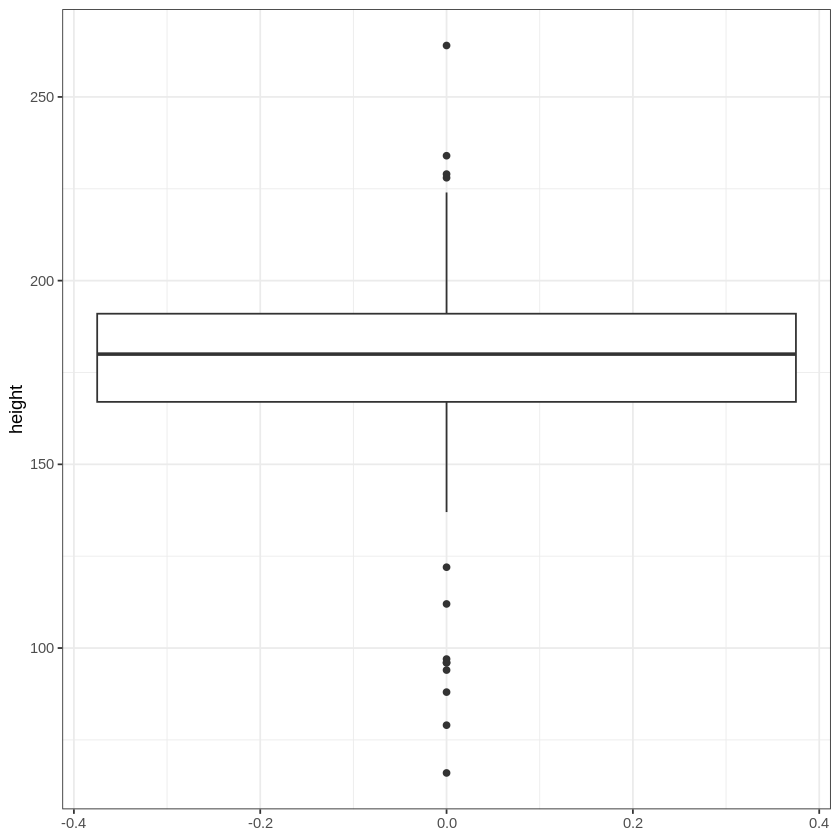

In [ ]:
ggplot(data = starwars, aes(y = height)) +
  geom_boxplot() +
  theme_bw()